<a href="https://colab.research.google.com/github/11doris/jazz-maestro/blob/colab_word_embeddings/tunes_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip uninstall -y gensim

Found existing installation: gensim 3.6.0
Uninstalling gensim-3.6.0:
  Successfully uninstalled gensim-3.6.0


In [3]:
pip install gensim

     |████████████████████████████████| 24.1 MB 2.7 kB/s 


In [4]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 27.5 MB/s 
     |████████████████████████████████| 15.7 MB 59 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=a32069ec34815108518405b2508f284d47013e41634bdce89686a0ce92dc120d
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into

In [1]:
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pprint
import pandas as pd
import numpy as np

In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
print(gensim.__version__)

4.1.2


# Initialization

## Download the Data

With repetitions in Chords:

In [4]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1YvpsEo6OGObpFsxgfZ_nPtgs1u59ydJy' -O input_seq.txt

--2021-11-10 21:51:31--  https://docs.google.com/uc?export=download&id=1YvpsEo6OGObpFsxgfZ_nPtgs1u59ydJy
Resolving docs.google.com (docs.google.com)... 172.217.212.113, 172.217.212.102, 172.217.212.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0rde6ejg4tskl95dp8jorll0o3hi19el/1636581075000/14329102864480165501/*/1YvpsEo6OGObpFsxgfZ_nPtgs1u59ydJy?e=download [following]
--2021-11-10 21:51:31--  https://doc-10-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0rde6ejg4tskl95dp8jorll0o3hi19el/1636581075000/14329102864480165501/*/1YvpsEo6OGObpFsxgfZ_nPtgs1u59ydJy?e=download
Resolving doc-10-4c-docs.googleusercontent.com (doc-10-4c-docs.googleusercontent.com)... 142.250.136.132, 2607:f8b0:4001:c34::84
Connecting to doc-10-4c-docs.googleusercontent.com (doc-10

No repetitions in Chords:

In [5]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pyPEWnD8aNETZNHI-tN9siHgr3ZSfs9a' -O input_seq.txt

--2021-11-10 21:51:33--  https://docs.google.com/uc?export=download&id=1pyPEWnD8aNETZNHI-tN9siHgr3ZSfs9a
Resolving docs.google.com (docs.google.com)... 172.217.212.113, 172.217.212.102, 172.217.212.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u7ash0i3n0lflc7tv9ab0ge3mq5nl6e3/1636581075000/14329102864480165501/*/1pyPEWnD8aNETZNHI-tN9siHgr3ZSfs9a?e=download [following]
--2021-11-10 21:51:34--  https://doc-08-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u7ash0i3n0lflc7tv9ab0ge3mq5nl6e3/1636581075000/14329102864480165501/*/1pyPEWnD8aNETZNHI-tN9siHgr3ZSfs9a?e=download
Resolving doc-08-4c-docs.googleusercontent.com (doc-08-4c-docs.googleusercontent.com)... 142.250.136.132, 2607:f8b0:4001:c34::84
Connecting to doc-08-4c-docs.googleusercontent.com (doc-08

With repetitions, full chords:

In [6]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pyPEWnD8aNETZNHI-tN9siHgr3ZSfs9a' -O input_seq.txt

--2021-11-10 21:51:37--  https://docs.google.com/uc?export=download&id=1pyPEWnD8aNETZNHI-tN9siHgr3ZSfs9a
Resolving docs.google.com (docs.google.com)... 172.217.212.100, 172.217.212.113, 172.217.212.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u7ash0i3n0lflc7tv9ab0ge3mq5nl6e3/1636581075000/14329102864480165501/*/1pyPEWnD8aNETZNHI-tN9siHgr3ZSfs9a?e=download [following]
--2021-11-10 21:51:38--  https://doc-08-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u7ash0i3n0lflc7tv9ab0ge3mq5nl6e3/1636581075000/14329102864480165501/*/1pyPEWnD8aNETZNHI-tN9siHgr3ZSfs9a?e=download
Resolving doc-08-4c-docs.googleusercontent.com (doc-08-4c-docs.googleusercontent.com)... 142.250.136.132, 2607:f8b0:4001:c34::84
Connecting to doc-08-4c-docs.googleusercontent.com (doc-08

Download the file with the meta data from Google Drive:

In [7]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Qs_SNXKBCeHOZO4VTwIPLR6OsPzEjk6q' -O input_meta.csv

--2021-11-10 21:51:41--  https://docs.google.com/uc?export=download&id=1Qs_SNXKBCeHOZO4VTwIPLR6OsPzEjk6q
Resolving docs.google.com (docs.google.com)... 172.217.212.100, 172.217.212.139, 172.217.212.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/enq9lpkggpkanq6k1v1g9126qhj9k5cl/1636581075000/14329102864480165501/*/1Qs_SNXKBCeHOZO4VTwIPLR6OsPzEjk6q?e=download [following]
--2021-11-10 21:51:41--  https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/enq9lpkggpkanq6k1v1g9126qhj9k5cl/1636581075000/14329102864480165501/*/1Qs_SNXKBCeHOZO4VTwIPLR6OsPzEjk6q?e=download
Resolving doc-14-4c-docs.googleusercontent.com (doc-14-4c-docs.googleusercontent.com)... 142.250.136.132, 2607:f8b0:4001:c34::84
Connecting to doc-14-4c-docs.googleusercontent.com (doc-14

### Chords Data

In [8]:
path_to_file = '/content/input_seq.txt'

with open(path_to_file) as f: 
  lines = f.read().splitlines()

In [9]:
data = [line.split(' ') for line in lines]

In [10]:
def ngrams(tokens, n=2, sep='-'):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]


def list_to_ngrams(data, n=2, sep='-'):
  out = []
  for row in data:
    out.append(ngrams(row, n, sep))

  return out

In [11]:
#data = list_to_ngrams(data, 3)

### Meta Data

In [12]:
meta = pd.read_csv('input_meta.csv', sep='\t')
meta.head(5)

,id,file_name,title,composer,year,year_truncated,tonality,tune_key,tune_mode,structure,num_bars,time_signature,cycle_fifths_order,style,musicbrainz_id,wikidata_id,wikidata_allmusic,wiki_link,wikidata_description,lyricist
0,0,dataset/jazz1350/26-2.xml,26-2,John Coltrane,1960.0,1960.0,F major,F,major,AABA,32.0,4/4,-1.0,Medium Up Swing,eb51f0dd-c9a6-3849-b135-9cfaa7a90396,NaN,NaN,NaN,NaN,NaN
1,1,dataset/jazz1350/500 Miles High.xml,500 Miles High,Chick Corea,1978.0,1978.0,E minor,E,minor,NaN,26.0,4/4,1.0,Bossa Nova,1e03810a-6632-35ee-959b-dfd244be19b5,NaN,NaN,NaN,NaN,Neville Potter
2,2,dataset/jazz1350/502 Blues.xml,502 Blues,Jimmy Rowles,1962.0,1962.0,A minor,A,minor,NaN,32.0,3/4,0.0,Waltz,cff33fd3-7be2-3559-b06a-1d5cee201939,NaN,NaN,NaN,NaN,NaN
3,3,dataset/jazz1350/52nd Street Theme.xml,52nd Street Theme,Thelonious Monk,1944.0,1944.0,C major,C,major,AABA,32.0,4/4,0.0,Up Tempo Swing,aaa19faf-298a-3e89-9599-6a30866cd7fd,NaN,NaN,NaN,NaN,NaN
4,4,dataset/jazz1350/9.20 Special.xml,9.20 Special,Earle Warren,1941.0,1941.0,C major,C,major,AABA,32.0,4/4,0.0,Medium Swing,67755649-b89e-409c-ad6b-488f4cd455a5,Q16824165,NaN,https://en.wikipedia.org/wiki/9:20_Special,1941 song,William Engvick


In [13]:
titles = meta.loc[:, ['id', 'title']].drop_duplicates()
titles.set_index('id', inplace=True)
titles

,title
id,
0,26-2
1,500 Miles High
2,502 Blues
3,52nd Street Theme
4,9.20 Special
...,...
1807,You're Foolin' Someone
1808,You're Lucky To Me
1809,You're Nobody Till Somebody Loves You


In [14]:
assert len(data) == len(titles)

In [15]:
from gensim.test.utils import common_texts
import gensim.models as models
import gensim.corpora as corpora
from gensim.corpora.dictionary import Dictionary

# Create a corpus from a list of texts
id2word = corpora.Dictionary(data)

2021-11-10 21:51:50,801 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-11-10 21:51:50,805 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2021-11-10 21:51:50,807 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)", 'datetime': '2021-11-10T21:51:50.807191', 'gensim': '4.1.2', 'python': '3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]', 'platform': 'Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic', 'event': 'created'}
2021-11-10 21:51:50,896 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-11-10 21:51:50,985 : INFO : built Dictionary(478 unique tokens: ['AM7', 'Am7', 'B7', 'Bbm7', 'Bm7']...) from 1812 documents (total 82790 corpus positions)
2021-11-10 21:51:50,988 : INFO : Dictionary lifecycle event {'msg': "b

In [16]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(tune) for tune in data]

In [17]:
%%time
TOTAL_TOPICS = 50
lda_model = gensim.models.LdaModel(corpus=corpus, 
                                   id2word=id2word, 
                                   chunksize=200, 
                                   alpha='auto', 
                                   eta='auto', 
                                   random_state=42,
                                   #iterations=500, 
                                   num_topics=TOTAL_TOPICS, 
                                   passes=30, 
                                   per_word_topics=True,
                                   #eval_every=None,
                                   update_every=0,  # batch learning, start from scratch everytime (<> online learning)
                                   )

2021-11-10 21:52:02,359 : INFO : using autotuned alpha, starting with [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]
2021-11-10 21:52:02,369 : INFO : using serial LDA version on this node
2021-11-10 21:52:02,377 : INFO : running batch LDA training, 50 topics, 30 passes over the supplied corpus of 1812 documents, updating model once every 1812 documents, evaluating perplexity every 1812 documents, iterating 50x with a convergence threshold of 0.001000
2021-11-10 21:52:02,380 : INFO : PROGRESS: pass 0, at document #200/1812
2021-11-10 21:52:02,556 : INFO : optimized alpha [0.018246448, 0.021771045, 0.018677898, 0.018773766, 0.020457169, 0.018858202, 0.020283062, 0.018565357, 0.019702539, 0.018565249, 0.018663937, 0.018779308, 0.018561956,

CPU times: user 48.7 s, sys: 748 ms, total: 49.4 s
Wall time: 51.3 s


In [18]:
lda_model.print_topics()

2021-11-10 21:53:50,585 : INFO : topic #10 (0.004): 0.240*"D6" + 0.153*"B7(+#11)" + 0.146*"F#7alt" + 0.039*"CM7" + 0.038*"C7alt" + 0.032*"Bbm7" + 0.032*"F#M7" + 0.031*"G7" + 0.027*"Eb7" + 0.026*"F7(+#11)"
2021-11-10 21:53:50,588 : INFO : topic #16 (0.005): 0.108*"D13" + 0.087*"Dm7" + 0.072*"G7" + 0.068*"CM7" + 0.066*"Am7" + 0.044*"E13(+#11)" + 0.034*"E7" + 0.033*"D7" + 0.033*"C13sus4" + 0.033*"B6"
2021-11-10 21:53:50,592 : INFO : topic #13 (0.006): 0.124*"C7(+b9)" + 0.106*"CM7" + 0.068*"Fm7" + 0.067*"Gm7b5" + 0.041*"FM7" + 0.038*"C(+9)" + 0.036*"G7(+b9)" + 0.034*"Gaug7" + 0.034*"Dm7b5" + 0.033*"Fm6"
2021-11-10 21:53:50,597 : INFO : topic #9 (0.007): 0.385*"Am11" + 0.204*"F" + 0.147*"Gm" + 0.054*"Bbm11" + 0.044*"Fdim" + 0.025*"C7" + 0.024*"Bb" + 0.022*"Em(+b6)" + 0.014*"Fdim7" + 0.012*"Em"
2021-11-10 21:53:50,599 : INFO : topic #39 (0.007): 0.373*"F7(+#11)" + 0.104*"G7" + 0.090*"Ebm6" + 0.061*"Cdim" + 0.061*"Fm7b5" + 0.044*"D7" + 0.041*"Fm6" + 0.035*"Dm7" + 0.025*"Aaug7" + 0.017*"C7"
20

[(10,
  '0.240*"D6" + 0.153*"B7(+#11)" + 0.146*"F#7alt" + 0.039*"CM7" + 0.038*"C7alt" + 0.032*"Bbm7" + 0.032*"F#M7" + 0.031*"G7" + 0.027*"Eb7" + 0.026*"F7(+#11)"'),
 (16,
  '0.108*"D13" + 0.087*"Dm7" + 0.072*"G7" + 0.068*"CM7" + 0.066*"Am7" + 0.044*"E13(+#11)" + 0.034*"E7" + 0.033*"D7" + 0.033*"C13sus4" + 0.033*"B6"'),
 (13,
  '0.124*"C7(+b9)" + 0.106*"CM7" + 0.068*"Fm7" + 0.067*"Gm7b5" + 0.041*"FM7" + 0.038*"C(+9)" + 0.036*"G7(+b9)" + 0.034*"Gaug7" + 0.034*"Dm7b5" + 0.033*"Fm6"'),
 (9,
  '0.385*"Am11" + 0.204*"F" + 0.147*"Gm" + 0.054*"Bbm11" + 0.044*"Fdim" + 0.025*"C7" + 0.024*"Bb" + 0.022*"Em(+b6)" + 0.014*"Fdim7" + 0.012*"Em"'),
 (39,
  '0.373*"F7(+#11)" + 0.104*"G7" + 0.090*"Ebm6" + 0.061*"Cdim" + 0.061*"Fm7b5" + 0.044*"D7" + 0.041*"Fm6" + 0.035*"Dm7" + 0.025*"Aaug7" + 0.017*"C7"'),
 (32,
  '0.142*"C13" + 0.111*"Bb13" + 0.104*"F13" + 0.083*"Gm11" + 0.053*"B13" + 0.044*"F" + 0.041*"G13sus4" + 0.037*"F(+9)" + 0.032*"Fm9" + 0.032*"Fm11"'),
 (43,
  '0.287*"Dm6" + 0.183*"Am6" + 0.058*"D

In [19]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    #return "hsl(200, 22%%, %d%%)" % random.randint(30, 70)
    return "hsl(200, 22%, 60%)"
    

In [21]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(#stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  #max_words=10,
                  colormap='tab10',
                  color_func=grey_color_func,
                  #color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(num_topics=4, num_words=50, formatted=False)
len(topics)

4

In [22]:
lda_model[corpus]

Source: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

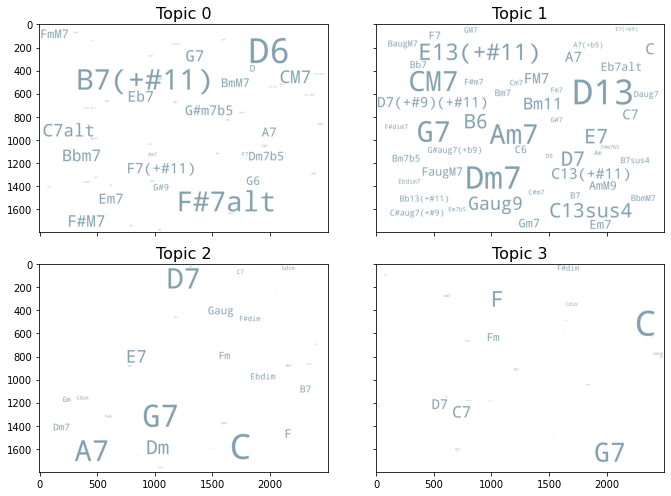

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10,7), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    #plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
#plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [26]:
from collections import Counter
topics = lda_model.show_topics(num_topics=TOTAL_TOPICS, num_words=10, formatted=False)
print(topics[0])
data_flat = [w for w_list in data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([i, word , weight, counter[word]])

out

(0, [('Dm11', 0.27844408), ('F#7(+b9)', 0.14956522), ('C#m7b5', 0.13598807), ('C#9(+#11)', 0.07984906), ('Bm7', 0.05906479), ('Em7', 0.052677114), ('Am7', 0.04731564), ('G#m7b5', 0.045619432), ('C#m7', 0.03428609), ('Csus4', 0.029408704)])


[[0, 'Dm11', 0.27844408, 79],
 [0, 'F#7(+b9)', 0.14956522, 41],
 [0, 'C#m7b5', 0.13598807, 51],
 [0, 'C#9(+#11)', 0.07984906, 22],
 [0, 'Bm7', 0.05906479, 432],
 [0, 'Em7', 0.052677114, 2332],
 [0, 'Am7', 0.04731564, 3512],
 [0, 'G#m7b5', 0.045619432, 34],
 [0, 'C#m7', 0.03428609, 224],
 [0, 'Csus4', 0.029408704, 8],
 [1, 'Dm7', 0.21836948, 7037],
 [1, 'G7', 0.1815306, 9488],
 [1, 'A7', 0.13313533, 3208],
 [1, 'Em7', 0.10729246, 2332],
 [1, 'CM7', 0.05263017, 4977],
 [1, 'Bb7', 0.04659603, 1205],
 [1, 'C7', 0.044633206, 2866],
 [1, 'Gm7', 0.042753186, 1083],
 [1, 'C6', 0.03998839, 2743],
 [1, 'FM7', 0.029806152, 1688],
 [2, 'Am6', 0.373262, 336],
 [2, 'Bm7b5', 0.085666694, 922],
 [2, 'E7(+b9)', 0.08150982, 882],
 [2, 'C#7(+#11)', 0.06494954, 69],
 [2, 'E7(+b13)', 0.038921732, 162],
 [2, 'Dm7', 0.0375176, 7037],
 [2, 'G7alt', 0.029575685, 32],
 [2, 'Baug7', 0.028606042, 41],
 [2, 'Bb7', 0.023410324, 1205],
 [2, 'CM7', 0.018946165, 4977],
 [3, 'E7', 0.37818342, 1649],
 [3, 'Am7', 0.25257

In [27]:
df = pd.DataFrame(out, columns=['topic_id', 'word',  'importance', 'word_count'])  
df     

,topic_id,word,importance,word_count
0,0,Dm11,0.278444,79
1,0,F#7(+b9),0.149565,41
2,0,C#m7b5,0.135988,51
3,0,C#9(+#11),0.079849,22
4,0,Bm7,0.059065,432
...,...,...,...,...
495,49,G7,0.050550,9488
496,49,Gaug7(+#9),0.046654,28
497,49,Em7b5,0.034958,480
498,49,Bb9(+#11),0.033121,23


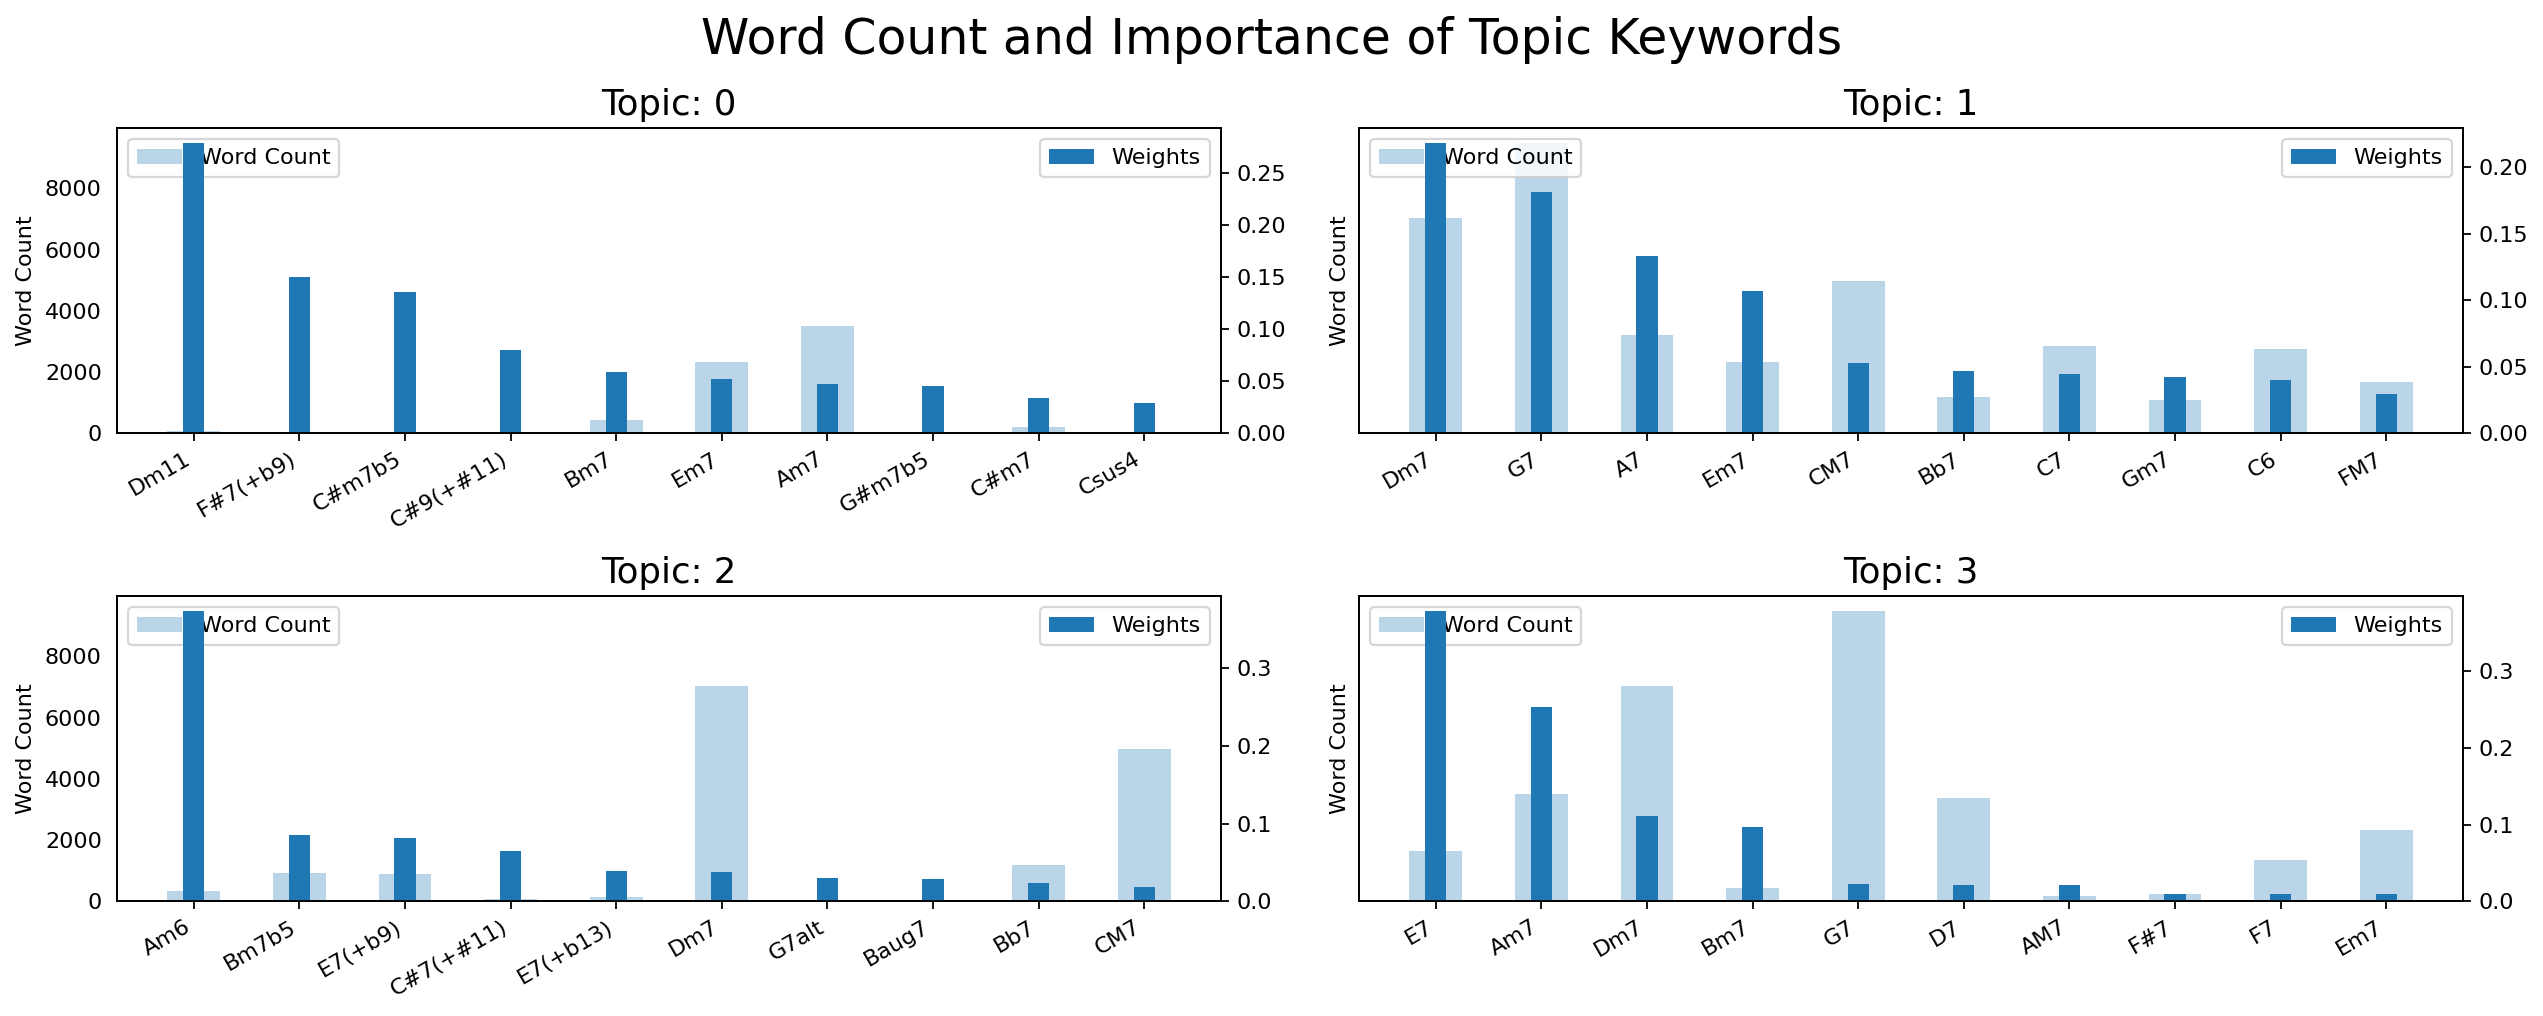

In [28]:
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,6), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', 
           height="word_count", 
           data=df.loc[df.topic_id==i, :], 
           #color=cols[i], 
           width=0.5, 
           alpha=0.3, 
           label='Word Count')
    
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', 
                height="importance", 
                data=df.loc[df.topic_id==i, :], 
                #color=cols[i], 
                width=0.2, 
                label='Weights')
    ax.set_ylabel('Word Count')
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    
    ax.set_title('Topic: ' + str(i), fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [29]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

2021-11-10 21:56:25,978 : INFO : Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
2021-11-10 21:56:26,008 : INFO : Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
35     0.204114  0.337150       1        1  10.328442
1      0.259989 -0.085765       2        1   9.549880
18     0.255522  0.264687       3        1   7.403134
46     0.233768 -0.129569       4        1   7.276891
48     0.237409 -0.151207       5        1   6.376001
8      0.274062  0.031418       6        1   5.418742
4      0.231001  0.193231       7        1   4.004507
11     0.011416 -0.127729       8        1   3.809096
41     0.259343 -0.060292       9        1   3.514899
40     0.101199  0.129245      10        1   3.010040
30    -0.006500 -0.079914      11        1   2.564637
23    -0.010081  0.140546      12        1   2.477906
42     0.027192 -0.114803      13        1   2.476686
3      0.074873 -0.070868      14        1   2.232312
6      0.227932 -0.094512      15        1   1.840124
19    -0.032472 -0.069779      16        1   1.785014
45    -0.038486 -0.105802      17        1   1.748714
44     0.002528 -0.042524      18        1   1.472672
27     0.107028 -0.158521      19        1   1.373600
26    -0.144044  0.098691      20        1   1.365449
7     -0.117728 -0.105209      21        1   1.360276
14     0.112233  0.118431      22        1   1.272249
24     0.001345 -0.073629      23        1   1.248587
21    -0.037646 -0.085930      24        1   1.206061
31    -0.178097 -0.137771      25        1   0.957954
5     -0.037703 -0.055080      26        1   0.941669
28    -0.117035  0.071584      27        1   0.918000
37    -0.061873 -0.109769      28        1   0.844341
36    -0.020009 -0.109610      29        1   0.807818
2     -0.060587 -0.109711      30        1   0.796059
15    -0.087984 -0.085455      31        1   0.755361
20    -0.210384 -0.036175      32        1   0.733952
29    -0.088901  0.188213      33        1   0.715176
38    -0.034835 -0.172390      34        1   0.673737
22    -0.129296 -0.010982      35        1   0.619751
49     0.008804  0.031847      36        1   0.578194
17    -0.183314  0.101717      37        1   0.568622
25    -0.041668  0.071834      38        1   0.553509
47    -0.167352 -0.002477      39        1   0.546933
13     0.003815 -0.074997      40        1   0.503589
34    -0.107455  0.236227      41        1   0.458850
32    -0.185976  0.181225      42        1   0.449796
9     -0.093305  0.234951      43        1   0.428677
12    -0.156023  0.060184      44        1   0.409501
43    -0.140159 -0.036119      45        1   0.392937
33    -0.200716  0.041762      46        1   0.355003
0     -0.161360 -0.028306      47        1   0.320151
39     0.143995  0.059157      48        1   0.252226
16     0.141023 -0.060208      49        1   0.168981
10    -0.067601 -0.007002      50        1   0.133295, topic_info=        Term         Freq        Total Category  logprob  loglift
33         C  6242.000000  6242.000000  Default  30.0000  30.0000
1        Am7  3520.000000  3520.000000  Default  29.0000  29.0000
7        CM7  4992.000000  4992.000000  Default  28.0000  28.0000
8         D7  3325.000000  3325.000000  Default  27.0000  27.0000
38        C6  2749.000000  2749.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
101       Am     0.030289  1513.992192  Topic50  -8.2007  -4.1991
81   E7(+b9)     0.029253   905.746377  Topic50  -8.2355  -3.7202
22      EbM7     0.025589   274.292504  Topic50  -8.3693  -2.6594
19     Bm7b5     0.026505   943.191042  Topic50  -8.3341  -3.8593
9        Dm7     0.029027  6934.595732  Topic50  -8.2432  -5.7634

[2165 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
205      38  0.977823      A
202      11  0.626876  A(+9)
110      17  0.618200    A13
110      28  0.132471    A13
110      44  0.220786    A13
...     ...       ...    ...
365       7  0.142573  Gsus4
365      14  0.071287  Gsus4
365      28  0.071287  Gsus4


## Evaluating Topic Model Quality


In [30]:
cv_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=corpus, 
                                                      texts=data,
                                                      dictionary=id2word, 
                                                      coherence='c_v')
avg_coherence_cv = cv_coherence_model_lda.get_coherence()

umass_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, corpus=corpus, 
                                                         texts=data,
                                                         dictionary=id2word, 
                                                         coherence='u_mass')
avg_coherence_umass = umass_coherence_model_lda.get_coherence()

perplexity = lda_model.log_perplexity(corpus)

print('Avg. Coherence Score (Cv):', avg_coherence_cv)
print('Avg. Coherence Score (UMass):', avg_coherence_umass)
print('Model Perplexity:', perplexity)

2021-11-10 21:57:00,075 : INFO : using WordOccurrenceAccumulator to estimate probabilities from sliding windows
2021-11-10 21:57:00,217 : INFO : WordOccurrenceAccumulator accumulated stats from 1000 documents
2021-11-10 21:57:03,507 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2021-11-10 21:57:05,180 : INFO : -3.516 per-word bound, 11.4 perplexity estimate based on a held-out corpus of 1812 documents with 82790 words


Avg. Coherence Score (Cv): 0.4344803361465659
Avg. Coherence Score (UMass): -4.800033243815805
Model Perplexity: -3.516406987379795


with 15 topics

Avg. Coherence Score (Cv): 0.4431952139279488

Avg. Coherence Score (UMass): -1.7311264568500886

Model Perplexity: -3.2576540394272673



### Dominant Topics in Tunes

In [31]:
corpus[0]
print(f"corpus[0] contains tune0; {corpus[0]}")
print(f"e.g. chord-id 2 appears 5 times -> chord id 2 = {id2word.id2token[2]}")

corpus[0] contains tune0; [(0, 1), (1, 1), (2, 5), (3, 1), (4, 1), (5, 1), (6, 5), (7, 5), (8, 1), (9, 2), (10, 2), (11, 5), (12, 6), (13, 4), (14, 1), (15, 6), (16, 7), (17, 4)]
e.g. chord-id 2 appears 5 times -> chord id 2 = B7


In [32]:
tm_results = lda_model[corpus] 

In [33]:
for topics in tm_results[:5]:
  print(topics)

([(3, 0.0743429), (28, 0.111597575), (30, 0.14183721), (36, 0.16559818), (40, 0.08308574), (42, 0.21439049), (46, 0.19067702)], [(0, [42, 3, 30]), (1, [3, 36, 30, 42, 46]), (2, [42, 40, 3, 46]), (3, [36]), (4, [3, 42]), (5, [36, 42]), (6, [40, 30, 46, 36, 42]), (7, [46, 42, 30, 36, 3, 28]), (8, [28, 46, 3, 42, 40]), (9, [46, 42, 3, 36, 30, 40]), (10, [3, 42, 36]), (11, [42]), (12, [28, 36, 46]), (13, [30, 46, 42, 36, 3]), (14, [46, 36, 40, 30]), (15, [36, 28, 46, 42]), (16, [46, 40, 42, 36, 3, 30]), (17, [30, 36, 42, 46])], [(0, [(3, 0.2803916), (30, 0.20729214), (42, 0.5106762)]), (1, [(3, 0.6213234), (30, 0.089077644), (36, 0.17476009), (42, 0.058526795), (46, 0.05630382)]), (2, [(3, 0.029152898), (40, 0.10014068), (42, 4.852961), (46, 0.01161422)]), (3, [(36, 0.9914406)]), (4, [(3, 0.9083368), (42, 0.09163992)]), (5, [(36, 0.9797141), (42, 0.01987396)]), (6, [(30, 0.98217684), (36, 0.052703936), (40, 3.8517666), (42, 0.027304804), (46, 0.078256644)]), (7, [(3, 0.015322154), (28, 0.0

In [34]:
topics = [[(term, round(wt, 3)) 
               for term, wt in lda_model.show_topic(n, topn=20)] 
                   for n in range(0, lda_model.num_topics)]

for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['Dm11', 'F#7(+b9)', 'C#m7b5', 'C#9(+#11)', 'Bm7', 'Em7', 'Am7', 'G#m7b5', 'C#m7', 'Csus4', 'D', 'C#7(+#9)', 'F#m7b5', 'E7(+b9)', 'Bm7b5', 'Dm7', 'B7(+b9)', 'D7', 'G7', 'CM7']

Topic #2:
['Dm7', 'G7', 'A7', 'Em7', 'CM7', 'Bb7', 'C7', 'Gm7', 'C6', 'FM7', 'D7', 'Am7', 'Fm7', 'E7', 'F7', 'F#dim7', 'Em7b5', 'Ebdim7', 'Baug7', 'EM9']

Topic #3:
['Am6', 'Bm7b5', 'E7(+b9)', 'C#7(+#11)', 'E7(+b13)', 'Dm7', 'G7alt', 'Baug7', 'Bb7', 'CM7', 'AM7', 'A6', 'Cm7', 'A7(+b9)', 'Caug7', 'Em7b5', 'Cm6', 'Fm7', 'D7alt', 'F#m7b5']

Topic #4:
['E7', 'Am7', 'Dm7', 'Bm7', 'G7', 'D7', 'AM7', 'F#7', 'F7', 'Em7', 'A7', 'Bm7b5', 'A6', 'G7(+b5)(+b9)', 'CM7', 'B7', 'EbM7', 'FM7', 'Bb7', 'Fm7']

Topic #5:
['C', 'G7', 'Dm7', 'Em', 'Ebdim', 'Gaug', 'C#dim', 'B7', 'F', 'Fm', 'Dm', 'Caug', 'D7', 'C7', 'Cdim', 'Am', 'Aaug', 'A7', 'Am7', 'Adim']

Topic #6:
['C#M7', 'Bb7(+#11)', 'Bb7', 'Fm7', 'G7(+#11)', 'A7(+#11)', 'EbM7', 'F#7(+#11)', 'G#7', 'CM7', 'G#13', 'G#7sus4', 'Ebm7', 'C7', 'CmM7', 'Bb6', 'G7', 'F#7', 'E

In [35]:
len(topics)

50

In [36]:
topics_df = pd.DataFrame([[term for term, wt in topic] 
                              for topic in topics], 
                         columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, lda_model.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Topic 30,Topic 31,Topic 32,Topic 33,Topic 34,Topic 35,Topic 36,Topic 37,Topic 38,Topic 39,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49,Topic 50
Term1,Dm11,Dm7,Am6,E7,C,C#M7,Dm7,Cm7,C6,Am11,D6,Am7,Bb9,C7(+b9),D7,Bm7,D13,Am9,C,E7(+b9),C#m7,F#m7b5,BbM7,Am,A7(+b9),E,F7,Dm7b5,Eb7,G,FM7,Em7,C13,FM7(+#11),G#,C,G#M7,G7sus4,CM7,F7(+#11),C7,CM7,B7,Dm6,G#7,D9,CM7,BM7,Dm7,Cm
Term2,F#7(+b9),G7,Bm7b5,Am7,G7,Bb7(+#11),C#dim7,Fm7,G7,F,B7(+#11),Bm7b5,Am9,CM7,F6,Am7,Dm7,Dm9,G7,Bm7b5,F#7,B7(+b9),Cm7,E7,Em7b5,A,G7(+#9),CM7,C#7,Eb,Gm7,G#m7,Bb13,CM7(+#11),Bb,G7,Bbm7,CM7,C#M7(+#11),G7,Bb7,D7,F#m7,Am6,Ebm7,G9,G7,C7sus4,G7,Am7b5
Term3,C#m7b5,A7,E7(+b9),Dm7,Dm7,Bb7,G7,Gm7,Dm7,Gm,F#7alt,E7(+b9),G#M7(+#11),Fm7,C7,E7(+#9),G7,F#M7(+#11),A7,Am,B,Am7,CM9,Dm,Dm7,C7(+#9),Am(+b6),G7(+b9),G#M7,D,C7,GM7,F13,FmM7,C,F,G#dim7,E7sus4,B7(+#9),Ebm6,F7,G7,EM7,D7(+#9),Dm7,C6(+9),Dm7,F7sus4,Em7,D7(+b9)
Term4,C#9(+#11),Em7,C#7(+#11),Bm7,Em,Fm7,C6,EbM7,D7,Bbm11,CM7,Dm7,Gdim7,Gm7b5,Gm7,BbM7(+#11),CM7,Fm6,D7,Dm7,E6,A7(+b9),AM7,B7,D7(+#11),B7,F#7,Cdim7,D7,F,Em7,Cm7,Gm11,Fm9,C#,C7,C#M7,Am7,Eb7(+#11),Cdim,G7,A7,CM7,Aaug7(+#9),F#7,G13,Bb7,A7sus4,CM7,G7(+b13)
Term5,Bm7,CM7,E7(+b13),G7,Ebdim,G7(+#11),Ebdim7,Bbm7,F6,Fdim,C7alt,E7(+b13),DM7(+#11),FM7,Am7,CM7,Am7,Eb13,Dm,A7(+b9),Em9,E7alt,G#7(+#11),D7,Eaug7,C#7(+#9),C7sus4,Dm7,F#M7,Cm9,CM7,Bbm7,B13,Fm7,F#,D7,Eb7,G#9(+#11),G#M7,Fm7b5,B7,Gaug7,Em7,Eb7(+#9),A7,F9,Fm7,F#7,Ebdim7,Cm6
Term6,Em7,Bb7,Dm7,D7,Gaug,A7(+#11),CM7,G#M7,A7,C7,Bbm7,D7,C#13,C(+9),C7(+b9)sus4,Bm,E13(+#11),Eaug7(+#9),E7,Gm6,C#m,B7alt,C7(+#11),G7,Bm7b5,Dm7,Bb7(+b5),Em7b5,Fm7,Am7,Am7,C#m7,F,Gm9,G,Fm,Fm7,FM7,Bbm7,D7,Dm7,Dm7,Dm7,G#7(+#9),G6,Dm7,FM7,Eb7sus4,A7(+b9),G7
Term7,Am7,C7,G7alt,AM7,C#dim,EbM7,A7(+b13),Dm7,F#dim7,Bb,F#M7,FM7,C#9,G7(+b9),G#dim,Em,E7,C#7alt,F,G7,F#m11,FM7,Baug7(+b9),A7,G7(+b9),G6(+9),Edim7,A7(+b9),Bb7sus4,Em,Eaug7,EbM7,G13sus4,GM7(+#11),E,F#dim,C6,Dm7,Em11,Fm6,A7,FM7,DM7,B7,Bb7,D13,D7,C#m7,Am7,Gaug7(+#9)
Term8,G#m7b5,Gm7,Baug7,F#7,B7,F#7(+#11),AmM7,A7(+#9),C7,Em(+b6),G7,Gm7,E7(+#11),Gaug7,G7,Ebm,D7,Eaug7(+b9),Gaug,CM7,DM7,Em7b5,Am7,AmM7,D7sus4,A7sus4,E7(+b13),C6,DM7,Cm,Dm7,DM9,F(+9),Gm7,F,Cdim,Am7,Bb7sus4,Dm7,Dm7,Fm7,C7,A7,Bbaug7(+#9),CM7,G9sus4,EbM7,Em7,C6,Em7b5
Term9,C#m7,C6,Bb7,F7,F,G#7,Fm6,G7(+b9),Am7,Fdim7,Eb7,F7,Eb9,Dm7b5,Fm6,B7(+b13),C13sus4,Bbm9,Fm,FM7,AM7,E7(+#9),D7sus4,Adim,Dm,D,F7(+b13)sus4,G7,Ebm7,Em7,C7(+b9),Fm7,Fm9,Cm9,C9,A7,G7,Ebaug7,FM7,Aaug7,G#7,F#dim7,C#m7,Bb7(+#9),Em7,A9,Am7,AM7,A7,Bb9(+#11)
Term10,Csus4,FM7,CM7,Em7,Fm,CM7,FM7,EbM7(+#11),F7,Em,F7(+#11),G7,F#9(+#11),Fm6,Caug7,E7sus4,B6,Bm9,B7,AM7,CM7,Dm7,C6,F7,Aaug7,C7,B7(+b5),F#dim7,CM7,C,Caug7,Ebm7,Fm11,BM7(+#11),B7sus4,Gaug,F#9,F#m7b5,G#6,C7,D7(+b5),Em7,G7,F#aug7(+#9),Faug7,CM7,A7,A7,Fm6,G13(+b9)


In [37]:
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['TermsPerTopic'],
                         index=['Topic'+str(t) for t in range(1, lda_model.num_topics+1)]
                         )
topics_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,TermsPerTopic
Topic1,"Dm11, F#7(+b9), C#m7b5, C#9(+#11), Bm7, Em7, Am7, G#m7b5, C#m7, Csus4, D, C#7(+#9), F#m7b5, E7(+b9), Bm7b5, Dm7, B7(+b9), D7, G7, CM7"
Topic2,"Dm7, G7, A7, Em7, CM7, Bb7, C7, Gm7, C6, FM7, D7, Am7, Fm7, E7, F7, F#dim7, Em7b5, Ebdim7, Baug7, EM9"
Topic3,"Am6, Bm7b5, E7(+b9), C#7(+#11), E7(+b13), Dm7, G7alt, Baug7, Bb7, CM7, AM7, A6, Cm7, A7(+b9), Caug7, Em7b5, Cm6, Fm7, D7alt, F#m7b5"
Topic4,"E7, Am7, Dm7, Bm7, G7, D7, AM7, F#7, F7, Em7, A7, Bm7b5, A6, G7(+b5)(+b9), CM7, B7, EbM7, FM7, Bb7, Fm7"
Topic5,"C, G7, Dm7, Em, Ebdim, Gaug, C#dim, B7, F, Fm, Dm, Caug, D7, C7, Cdim, Am, Aaug, A7, Am7, Adim"
Topic6,"C#M7, Bb7(+#11), Bb7, Fm7, G7(+#11), A7(+#11), EbM7, F#7(+#11), G#7, CM7, G#13, G#7sus4, Ebm7, C7, CmM7, Bb6, G7, F#7, Em7, C#M7(+#11)"
Topic7,"Dm7, C#dim7, G7, C6, Ebdim7, CM7, A7(+b13), AmM7, Fm6, FM7, Em7, Am7, Aaug9, Gaug7, DmM7, A7, E7, C7, D7, Gm7"
Topic8,"Cm7, Fm7, Gm7, EbM7, Bbm7, G#M7, Dm7, A7(+#9), G7(+b9), EbM7(+#11), Bb7, F7, C7(+b9), AM9, G#m7, C#7(+#11), C#M7, C#6(+9), E13(+b9), A6(+9)"
Topic9,"C6, G7, Dm7, D7, F6, A7, F#dim7, C7, Am7, F7, E7, G6, Fm6, Bb7, G9sus4, G#7, B7, Eb6, Bb6, Gaug7"
Topic10,"Am11, F, Gm, Bbm11, Fdim, C7, Bb, Em(+b6), Fdim7, Em, Aaug7(+b9), Gm7, Em6, G7, Bbm, G#dim7, D7, F7, Dm7, Em7"


In [42]:
for topics in tm_results[:5]:
  print(topics)

([(3, 0.074339285), (28, 0.11158085), (30, 0.14182374), (36, 0.16562124), (40, 0.08308527), (42, 0.21438058), (46, 0.19069818)], [(0, [42, 3, 30]), (1, [3, 36, 30, 42, 46]), (2, [42, 40, 3, 46]), (3, [36]), (4, [3, 42]), (5, [36, 42]), (6, [40, 30, 46, 36, 42]), (7, [46, 42, 30, 36, 3, 28]), (8, [28, 46, 3, 42, 40]), (9, [46, 42, 3, 36, 30, 40]), (10, [3, 42, 36]), (11, [42]), (12, [28, 36, 46]), (13, [30, 46, 42, 36, 3]), (14, [46, 36, 40, 30]), (15, [36, 28, 46, 42]), (16, [46, 40, 42, 36, 3, 30]), (17, [30, 36, 42, 46])], [(0, [(3, 0.28039333), (30, 0.20728378), (42, 0.51068246)]), (1, [(3, 0.62129796), (30, 0.08906986), (36, 0.17478803), (42, 0.058524758), (46, 0.05631111)]), (2, [(3, 0.029152686), (40, 0.10014475), (42, 4.8529553), (46, 0.011616116)]), (3, [(36, 0.99144095)]), (4, [(3, 0.90833634), (42, 0.09164043)]), (5, [(36, 0.97971785), (42, 0.019870168)]), (6, [(30, 0.98209935), (36, 0.052712813), (40, 3.8518257), (42, 0.027304083), (46, 0.07826745)]), (7, [(3, 0.015320063), 

In [41]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]
corpus_topics

#corpus_topics = topics

TypeError: ignored

In [40]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(data))
corpus_topic_df['DominantTopic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution%'] = [round(item[1]*100, 2) for item in corpus_topics]
#corpus_topic_df['TopicDesc'] = [topics_df.iloc[t[0]]['TermsPerTopic'] for t in corpus_topics]
#corpus_topic_df['Tunes'] = data

TypeError: ignored

In [163]:
corpus_topic_df['Title'] = titles['title']

In [164]:
corpus_topic_df

,Document,DominantTopic,Contribution%,Title
0,0,6,44.83,26-2
1,1,6,59.95,500 Miles High
2,2,4,34.50,502 Blues
3,3,5,55.44,52nd Street Theme
4,4,9,34.82,9.20 Special
...,...,...,...,...
1807,1807,5,88.12,You're Foolin' Someone
1808,1808,2,68.06,You're Lucky To Me
1809,1809,5,83.50,You're Nobody Till Somebody Loves You
1810,1810,5,80.28,Your Feet's Too Big


In [165]:
corpus_topic_df.groupby('DominantTopic').apply(lambda topic_set: (topic_set.sort_values(by=['Contribution%'], 
                                                                                         ascending=False)
                                                                             .iloc[0])
)


,Document,DominantTopic,Contribution%,Title
DominantTopic,,,,
1,362,1,98.90,Everybody's Song But My Own
2,390,2,99.47,"Folks Who Live On The Hill, The"
3,123,3,98.48,Besame Mucho
4,1116,4,98.96,Strode Rode
5,1569,5,99.47,Ja-Da
6,861,6,94.83,Naima
7,1611,7,96.69,Minnie The Moocher
8,1123,8,98.04,Summer In Central Park
9,1261,9,98.04,Well You Needn't


In [166]:
corpus_topic_df.value_counts('DominantTopic')

DominantTopic
2     691
5     486
6     144
3     100
4     100
9     87 
10    67 
8     59 
1     53 
7     25 
dtype: int64

### List the Tunes of the individual Topics

In [167]:
def display_tunes_per_topic(df, topic):
  tunes = df.query(f"DominantTopic == {topic}").sort_values('Contribution%', ascending=False)
  print(f"Topic {topic}: {len(tunes)} tunes")
  return tunes


In [ ]:
display_tunes_per_topic(corpus_topic_df, topic=1).head(30)

In [149]:
display_tunes_per_topic(corpus_topic_df, topic=2).head(30)

Topic 2: 691 tunes


,Document,DominantTopic,Contribution%,Title
390,390,2,99.47,"Folks Who Live On The Hill, The"
160,160,2,99.27,"Blue Room, The"
1403,1403,2,99.27,"Blue Room, The"
831,831,2,99.25,More Than You Know
458,458,2,99.24,Heatwave
67,67,2,99.20,All Too Soon
637,637,2,99.20,It's Easy To Remember
1241,1241,2,99.14,Violets For Your Furs
90,90,2,99.14,As Time Goes By
346,346,2,99.14,Eclypso


In [150]:
display_tunes_per_topic(corpus_topic_df, topic=3).head(30)

Topic 3: 100 tunes


,Document,DominantTopic,Contribution%,Title
123,123,3,98.48,Besame Mucho
671,671,3,97.03,Kary's Trance
293,293,3,96.76,Decision
140,140,3,95.58,Birk's Works
608,608,3,93.74,Interplay
69,69,3,91.19,Alone Together
241,241,3,88.65,Close Your Eyes
1258,1258,3,86.43,We Will Meet Again
942,942,3,86.27,"Peacocks, The"
535,535,3,82.09,I Will Wait For You


In [53]:
display_tunes_per_topic(corpus_topic_df, topic=4).head(30)

Topic 4: 100 tunes


,Document,DominantTopic,Contribution%,Title
1116,1116,4,98.96,Strode Rode
863,863,4,98.10,Nardis
225,225,4,97.11,Chameleon
298,298,4,96.80,Deluge
101,101,4,93.07,Bags and Trane
791,791,4,91.22,Midnight Blue
731,731,4,91.04,Little Sunflower
837,837,4,91.01,Mr. P.C.
357,357,4,91.01,Equinox
822,822,4,90.21,Moondance


In [54]:
display_tunes_per_topic(corpus_topic_df, topic=5).head(30)

Topic 5: 486 tunes


,Document,DominantTopic,Contribution%,Title
1569,1569,5,99.47,Ja-Da
1559,1559,5,99.34,If You Were The Only Girl In The World
1465,1465,5,99.26,Don't Sit Under The Apple Tree
1535,1535,5,99.25,I Wish I Could Shimmy Like My Sister Kate
1731,1731,5,99.24,Sweet As Bear Meat
1680,1680,5,99.22,Royal Garden Blues
1343,1343,5,99.17,'Tain't What You Do (It's The Way That Cha Do It)
1657,1657,5,99.14,Painting The Clouds With Sunshine
1703,1703,5,99.10,Slow Boat To China
1459,1459,5,99.09,Don't Blame Me


In [55]:
display_tunes_per_topic(corpus_topic_df, topic=6).head(30)

Topic 6: 144 tunes


,Document,DominantTopic,Contribution%,Title
861,861,6,94.83,Naima
946,946,6,90.39,Pensativa
681,681,6,87.67,Ladies In Mercedes
650,650,6,86.23,Jeannine
933,933,6,84.27,Pannonica
660,660,6,83.02,Juju
400,400,6,82.73,Forest Flower
440,440,6,80.19,Goodbye
808,808,6,79.97,Miyako
828,828,6,78.77,"Moontrane, The"


In [56]:
display_tunes_per_topic(corpus_topic_df, topic=7).head(30)

Topic 7: 25 tunes


,Document,DominantTopic,Contribution%,Title
1611,1611,7,96.69,Minnie The Moocher
1390,1390,7,96.29,Bei Mir Bist Du Schon (Root Hog Or Die)
1095,1095,7,96.05,St. James Infirmary
382,382,7,95.47,Fever
417,417,7,91.83,Gary's Notebook
768,768,7,88.29,Mahjong
1452,1452,7,84.59,Diga Diga Doo
1726,1726,7,83.50,Summertime
1662,1662,7,80.43,Petite Fleur
1697,1697,7,76.48,"Shout 'Em, Aunt Tillie"


In [59]:
display_tunes_per_topic(corpus_topic_df, topic=8).head(30)

Topic 8: 59 tunes


,Document,DominantTopic,Contribution%,Title
1123,1123,8,98.04,Summer In Central Park
961,961,8,96.05,Pinocchio
586,586,8,91.21,Ill Wind
725,725,8,83.04,Little Chicago Fire
1058,1058,8,81.86,So Many Stars
451,451,8,81.04,Happiness Is A Thing Called Joe
1313,1313,8,80.47,You Better Leave it Alone
1278,1278,8,79.44,When The Sun Comes Out
287,287,8,74.43,Daybreak
602,602,8,71.87,Incentive


In [60]:
display_tunes_per_topic(corpus_topic_df, topic=9).head(30)

Topic 9: 87 tunes


,Document,DominantTopic,Contribution%,Title
1261,1261,9,98.04,Well You Needn't
548,548,9,97.55,I'll See You In My Dreams
1223,1223,9,97.33,Twisted
1166,1166,9,96.93,There'll Be Some Changes Made
1032,1032,9,92.13,Seven Come Eleven
22,22,9,90.20,A Smooth One
887,887,9,83.78,Nuages
695,695,9,82.72,Lazy River
1578,1578,9,82.72,Lazy River
1024,1024,9,82.58,Sentimental Journey


In [142]:
corpus_topic_df.query("DominantTopic == 10").sort_values('Contribution%', ascending=False).head(20)

,Document,DominantTopic,Contribution%,Title
764,764,10,99.60,Lush Life
809,809,10,99.46,Moanin'
172,172,10,99.44,Blues March
79,79,10,99.35,Angel Eyes
194,194,10,99.32,Brother Can You Spare A Dime
1076,1076,10,99.30,Somewhere
959,959,10,99.30,Ping Pong
620,620,10,99.25,It Ain't Necessarily So
1011,1011,10,99.19,Satellite
553,553,10,99.16,I'm Beginning To See The Light
